In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install category_encoders
!pip install scikit-learn

In [299]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import time
import matplotlib.pyplot as plt

In [300]:
df = pd.read_csv('dataset_SCL.csv', dtype={'Vlo-I': 'str', 'Vlo-O': 'str'})
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [78]:
df.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [6]:
# Total NaN
df.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [8]:
# Total de Registros | Total Records
df.shape[0]

68206

In [11]:
# Pais de origen de los vuelos | Country Origin of the flights
df['SIGLAORI'].value_counts()

Santiago    68206
Name: SIGLAORI, dtype: int64

In [12]:
# Rango de fecha de los vuelos | Flight date range
df['AÑO'].value_counts()

2017    68204
2018        2
Name: AÑO, dtype: int64

In [82]:
## Vuelos del año 2018 tienen como Fecha Inicial minutos antes del año 2018 |
## Flights of the year 2018 have as Initial Date minutes before the year 2018
df[df['AÑO']==2018]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


In [15]:
# Tipo de vuelo en porcentaje | Flight type in percentage
df['TIPOVUELO'].value_counts(normalize=True).mul(100)

N    54.197578
I    45.802422
Name: TIPOVUELO, dtype: float64

In [21]:
# Total Vuelo redirigidos | Total redirected flight
df[df['Des-I']!=df['Des-O']].shape[0]

28

In [22]:
# Total vuelo redirigidos por tipo de vuelo | Total redirected flights by type of flight
df[df['Des-I']!=df['Des-O']]['TIPOVUELO'].value_counts()

N    14
I    14
Name: TIPOVUELO, dtype: int64

In [23]:
# Vuelos tomados por otra empresa | Flights taken by another company
df[df['Emp-I']!=df['Emp-O']].shape[0]

18669

In [25]:
# Vuelos que cambiaron su número de operacion | Flights that changed their operation number
df[df['Vlo-I']!=df['Vlo-O']].shape[0]


4519

In [61]:
df['SIGLADES'].value_counts().to_frame().iloc[:20]

,SIGLADES
Buenos Aires,6335
Antofagasta,5786
Lima,5270
Calama,5146
Puerto Montt,4357
Concepcion,3993
Iquique,3747
Sao Paulo,3569
Temuco,2589
Arica,2436


<AxesSubplot:>

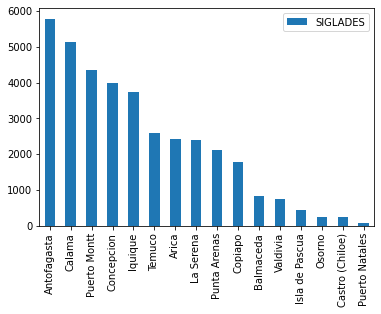

In [83]:
## Vuelos nacionales - Cantidad | Nacional flights - Counts
df[df['TIPOVUELO']=='N']['SIGLADES'].value_counts().to_frame().iloc[:20].plot.bar()

<AxesSubplot:>

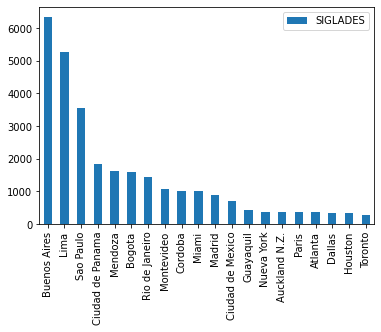

In [84]:
## Vuelos internacionales - Cantidad | Internacional Flights Counts
df[df['TIPOVUELO']=='I']['SIGLADES'].value_counts().to_frame().iloc[:20].plot.bar()

<AxesSubplot:>

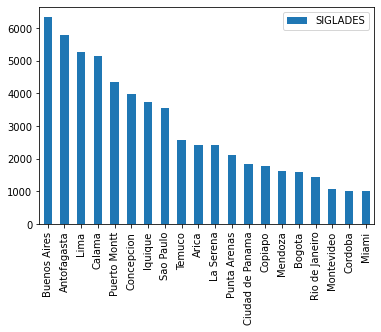

In [85]:
## General
df['SIGLADES'].value_counts().to_frame().iloc[:20].plot.bar()

In [47]:
# Vuelos por dia | Flights per day
df.groupby(by=['AÑO', 'MES', 'DIA']).size().to_frame('Count').reset_index()['Count'].describe()

### 366 days
# Mean flights per day = 186
# Standard deviation 21.84
# Min 2 flights
# Max 230 flights

count    366.000000
mean     186.355191
std       21.845524
min        2.000000
25%      174.000000
50%      187.000000
75%      202.000000
max      230.000000
Name: Count, dtype: float64

In [98]:
# Mayor número de vuelos por dia | Máx flights in a day
temp_df = df.groupby(by=['AÑO', 'MES', 'DIA']).size().to_frame('Count').reset_index()
temp_df[temp_df['Count']==temp_df['Count'].max()]

,AÑO,MES,DIA,Count
355,2017,12,22,230


In [100]:
# Menor número de vuelos por dia | Min flights in a day
temp_df = df[df['AÑO']!=2018].groupby(by=['AÑO', 'MES', 'DIA']).size().to_frame('Count').reset_index()
temp_df[temp_df['Count']==temp_df['Count'].min()]

,AÑO,MES,DIA,Count
104,2017,4,15,126


In [67]:
# Distribution of flights by month
df.groupby(['AÑO', 'MES']).size()

AÑO   MES
2017  1      6106
      2      5561
      3      5482
      4      5020
      5      5240
      6      4981
      7      5992
      8      5744
      9      5610
      10     6032
      11     6080
      12     6356
2018  1         2
dtype: int64

In [105]:
## Stats info of previous values
df.groupby(['AÑO', 'MES']).size().reset_index(name='Count').describe()

,AÑO,MES,Count
count,13.000000,13.000000,13.000000
mean,2017.076923,6.076923,5246.615385
std,0.277350,3.774068,1632.938483
min,2017.000000,1.000000,2.000000
25%,2017.000000,3.000000,5240.000000
50%,2017.000000,6.000000,5610.000000
75%,2017.000000,9.000000,6032.000000
max,2018.000000,12.000000,6356.000000


In [76]:
## Mes donde se realizaron la mayor cantidad de vuelos en el dataset |
## Month where the largest number of flights were made in the dataset
temp_df = df.groupby(['AÑO', 'MES']).size().reset_index(name='COUNT')
temp_df[temp_df['COUNT']==temp_df['COUNT'].max()]

,AÑO,MES,COUNT
11,2017,12,6356


### Análisis

[ESP]

Se analizó primero el contexto temporal y regional del dataset:

Todos los vuelos se originaron en el aeropuerto de Santiago de Chile, el cual es esperado por ser LATAM chile el organizador del reto.
El tiempo es del año 2017 enteramente y ciertamente se tiene dos registros para el año 2018 pero fueron realizados a penas minutos de iniciar el año y estaba programados para el año 2017 casi a la media noche.


Se analizó las caracteristicas del dataset:

Caracteristicas tecnicas siempre son buenas como el tipo de variable de la informacion y no se obtuvo nada interesante,
Para las variables faltantes solo se tiene un valor para Vlo-O. Por último se tiene 18 variables en el dataset


Se continuó con caracteristicas numéricas del dataset:

Las ciudades nacionales (Chile) a la cual más se viaja es Antofagasta, seguida de Calama y de Puerto Montt, por otro lado las ciudades internacionales a la cual más se viaja es Buenos Aires (Argentina), seguida de Lima (Perú) y Sao Paulo (Brasil), es aqui donde se nota que los vuelos no son casi todos latinoamericanos y a Miami. Teniendo en cuenta que Chile tiene vuelos a Europa (https://www.24horas.cl/economia/british-airways-anuncia-vuelo-directo-entre-santiago-y-londres-desde-2017-2018946) y que la competencia es organizada por LATAM se espera que el dataset esta limitado a las regiones que opera LATAM (https://www.latamairlinesgroup.net/es/network) sin embargo es un dataset ad-hoc para el concurso puesto que incluso ciudades en las que opera latam NewYork y Boston no se encuentran registrados.


Totales:

Hay 68206 registros en total de los vuelos en el dataset, de esos:

18669 tienen una empresa un código de línea aérea de vuelo programado pero fueron cambiados a la hora de operar, por lo que se intuye que son vuelos tomados por otra empresa.

Son 28 los vuelos que tenian como origen una ciudad pero terminaron en otra por cualquier motivo. 14 son internacional y 14 nacional

Caracteristica de frecuencias:

En promedio por dia se tiene 186 vuelos, el dia donde se tuvo más vuelos fue el 22 de Diciembre con 230 vuelos y el dia que menos se volo fue el 15 de Abril con 126 vuelos. Como desviacion estandar de los vuelos diarios se tiene 21.84 por lo que en un rango de 21 unidades de 186 se tiene la mayoria de los vuelos por día

El més donde se tiene más registros es Dicieimbre con 6536, sin embargo no esta muy alejados de los otros valores ya que la desviacion estandar de la cantidad de vuelos en registros mensuales es de 0.21


[EN]

The temporal and regional context of the dataset was first analyzed:

All the flights originated at the Santiago de Chile airport, which is expected as LATAM Chile is the organizer of the challenge.
The time is from the year 2017 entirely and surely there are two records for the year 2018 but they were made just minutes before the start of the year and it was scheduled for the year 2017 almost at midnight.


The characteristics of the data set were analyzed:

The technical characteristics are always good as the type of variable of the information and nothing interesting was obtained,
For the missing variables, there is only one value for Vlo-O. Finally, there are 18 variables in the dataset


We continued with the numerical characteristics of the data set:

The national cities (Chile) to which most travel is Antofagasta, followed by Calama and Puerto Montt, on the other hand, the international cities to which most travel is Buenos Aires (Argentina), followed by Lima (Peru) and Sao Paulo (Brazil), it is here where it is noted that the flights are not almost all Latin American and to Miami. Bearing in mind that Chile has flights to Europe (https://www.24horas.cl/economia/british-airways-anuncia-vuelo-directo-entre-santiago-y-londres-desde-2017-2018946) and that the competition is organized by LATAM, it is expected that the dataset is limited to the regions that LATAM operates (https://www.latamairlinesgroup.net/es/network) however it is an ad-hoc dataset for the contest since even cities in which Opera latam NewYork and Boston are not registered.


Totals:

There are 68206 total records of the flights in the dataset, of those:

18669 have a company a scheduled flight airline code but they were changed at the time of operation, so it is intuited that they are flights taken by another company.

There are 28 flights that originated from one city but ended in another for whatever reason. 14 are international and 14 national

Frequency characteristics:

On average per day there are 186 flights, the day with the most flights was December 22 with 230 flights and the day with the fewest flights was April 15 with 126 flights. As a standard deviation of the daily flights, there is 21.84, so in a range of 21 units of 186, there are the most flights per day.

The month where there are more records is December with 6536, however it is not very far from the other values since the standard deviation of the number of flights in monthly records is 0.21

#### Pregunta 2 | Question 2

In [301]:
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])


In [302]:
# Calculando temporada altas

ranges = [((12, 15), (3, 3)), 
          ((7, 15), (7, 31)), 
          ((9, 11), (9, 30))]

def check_date_range(date):
    init_day_year = date.replace(month=1, day=1)
    end_day_year = date.replace(month=12, day=31)

    for range_ in ranges:
        start_date = datetime(year=int(date.year), month=int(range_[0][0]), day=int(range_[0][1]))
        end_date = datetime(year=int(date.year), month=int(range_[1][0]), day=int(range_[1][1]), hour=23, minute=59)

        if start_date > end_date: # year-1 to year
            if (start_date <= date <= end_day_year) or (init_day_year <= date <= end_date):
                return 1
        elif start_date <= date <= end_date:
            return 1
    
    return 0

df['high_season'] = df['Fecha-I'].apply(check_date_range)

## Calculando minutos de diferencia entre vuelo programado y operado
df['min_diff'] = (df['Fecha-O']-df['Fecha-I']).dt.total_seconds() / 60

### Calculando retrasos con minutos de diferencia entre vuelo programado y operado
df['delay_15'] = (df['min_diff']>15).astype(int)


## Calculando periodos de dia

time_ranges = [((5, 0), (11, 59), 'morning'), 
          ((12, 0), (18, 59), 'afternoon'), 
          ((19, 0), (4, 59), 'night')]

def check_time_range(date):
    init_day_hour = date.replace(hour=0, minute=0)
    end_day_hour = date.replace(hour=23, minute=59)
   
    for range_ in time_ranges:
        start_time = datetime(year=int(date.year), month=int(date.month), day=int(date.day), hour=int(range_[0][0]), minute=int(range_[0][1]))
        end_time = datetime(year=int(date.year), month=int(date.month), day=int(date.day), hour=int(range_[1][0]), minute=int(range_[1][1]))

        if start_time > end_time: # day-1 to day
            if (start_time <= date <= end_day_hour) or (init_day_hour <= date <= end_time):
                return range_[2]
        elif start_time <= date <= end_time:
            return range_[2]

df['period_day'] = df['Fecha-I'].apply(check_time_range)

#### Pregunta 3 | Question 3

What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight?What
variables would you expect to have the most influence in predicting delays?

In [112]:
# top 10 opera delayed flights
df.groupby('OPERA')['delay_15'].agg(
    [('delay_15_count', lambda x: (x == 1).sum()),
     ('total_count', 'count'),
     ('delay_15_ratio', lambda x: ((x == 1).sum() / x.count())*100),
     ('no_delay_15_ratio', lambda x: ((x == 0).sum() / x.count())*100)]).reset_index().sort_values(by=['delay_15_ratio'], ascending=False).iloc[:10]

,OPERA,delay_15_count,total_count,delay_15_ratio,no_delay_15_ratio
19,Plus Ultra Lineas Aereas,30,49,61.224490,38.775510
20,Qantas Airways,113,195,57.948718,42.051282
2,Air Canada,258,565,45.663717,54.336283
17,Latin American Wings,681,1674,40.681004,59.318996
11,Gol Trans,287,806,35.607940,64.392060
7,Avianca,306,1152,26.562500,73.437500
0,Aerolineas Argentinas,468,1949,24.012314,75.987686
6,Austral,15,74,20.270270,79.729730
14,JetSmart SPA,196,1095,17.899543,82.100457
12,Grupo LATAM,7306,40892,17.866575,82.133425


In [113]:
# Month delayed flights
df.groupby('MES')['delay_15'].agg(
    [('delay_15_count', lambda x: (x == 1).sum()),
     ('total_count', 'count'),
     ('delay_15_ratio', lambda x: ((x == 1).sum() / x.count())*100),
     ('no_delay_15_ratio', lambda x: ((x == 0).sum() / x.count())*100)]).reset_index().sort_values(by=['delay_15_ratio'], ascending=False)

,MES,delay_15_count,total_count,delay_15_ratio,no_delay_15_ratio
6,7,1758,5992,29.339119,70.660881
11,12,1615,6356,25.409062,74.590938
9,10,1363,6032,22.596154,77.403846
10,11,1199,6080,19.720395,80.279605
7,8,996,5744,17.339833,82.660167
8,9,967,5610,17.237077,82.762923
5,6,852,4981,17.104999,82.895001
0,1,978,6108,16.011788,83.988212
4,5,827,5240,15.782443,84.217557
1,2,843,5561,15.159144,84.840856


In [114]:
# high_season delayed flights

df.groupby('high_season')['delay_15'].agg(
    [('delay_15_count', lambda x: (x == 1).sum()),
     ('total_count', 'count'),
     ('delay_15_ratio', lambda x: ((x == 1).sum() / x.count())*100),
     ('no_delay_15_ratio', lambda x: ((x == 0).sum() / x.count())*100)]).reset_index().sort_values(by=['delay_15_ratio'], ascending=False)

,high_season,delay_15_count,total_count,delay_15_ratio,no_delay_15_ratio
1,1,4470,22762,19.637993,80.362007
0,0,8144,45444,17.920958,82.079042


In [115]:
# 'type of flight' - delayed flights

df.groupby('TIPOVUELO')['delay_15'].agg(
    [('delay_15_count', lambda x: (x == 1).sum()),
     ('total_count', 'count'),
     ('delay_15_ratio', lambda x: ((x == 1).sum() / x.count())*100),
     ('no_delay_15_ratio', lambda x: ((x == 0).sum() / x.count())*100)]).reset_index().sort_values(by=['delay_15_ratio'], ascending=False)

,TIPOVUELO,delay_15_count,total_count,delay_15_ratio,no_delay_15_ratio
0,I,7048,31240,22.560819,77.439181
1,N,5566,36966,15.057079,84.942921


In [116]:
# Day of week - delayed flights

df.groupby('DIANOM')['delay_15'].agg(
    [('delay_15_count', lambda x: (x == 1).sum()),
     ('total_count', 'count'),
     ('delay_15_ratio', lambda x: ((x == 1).sum() / x.count())*100),
     ('no_delay_15_ratio', lambda x: ((x == 0).sum() / x.count())*100)]).reset_index().sort_values(by=['delay_15_ratio'], ascending=False)

,DIANOM,delay_15_count,total_count,delay_15_ratio,no_delay_15_ratio
6,Viernes,2285,10292,22.201710,77.798290
2,Lunes,2048,10131,20.215181,79.784819
1,Jueves,2045,10251,19.949273,80.050727
4,Miercoles,1661,9722,17.084962,82.915038
3,Martes,1634,9662,16.911613,83.088387
5,Sabado,1363,8352,16.319444,83.680556
0,Domingo,1578,9796,16.108616,83.891384


In [117]:
# top 20 SIGLADES delayed flights

df.groupby('SIGLADES')['delay_15'].agg(
    [('delay_15_count', lambda x: (x == 1).sum()),
     ('total_count', 'count'),
     ('delay_15_ratio', lambda x: ((x == 1).sum() / x.count())*100),
     ('no_delay_15_ratio', lambda x: ((x == 0).sum() / x.count())*100)]).reset_index().sort_values(by=['delay_15_ratio'], ascending=False).iloc[:20]

,SIGLADES,delay_15_count,total_count,delay_15_ratio,no_delay_15_ratio
48,Quito,2,2,100.000000,0.000000
44,Puerto Stanley,1,1,100.000000,0.000000
15,Cochabamba,1,1,100.000000,0.000000
59,Ushuia,4,6,66.666667,33.333333
55,Sydney,113,194,58.247423,41.752577
32,Melbourne,21,39,53.846154,46.153846
6,Bariloche,1,2,50.000000,50.000000
51,Rosario,54,136,39.705882,60.294118
4,Auckland N.Z.,135,361,37.396122,62.603878
46,Punta Cana,18,54,33.333333,66.666667


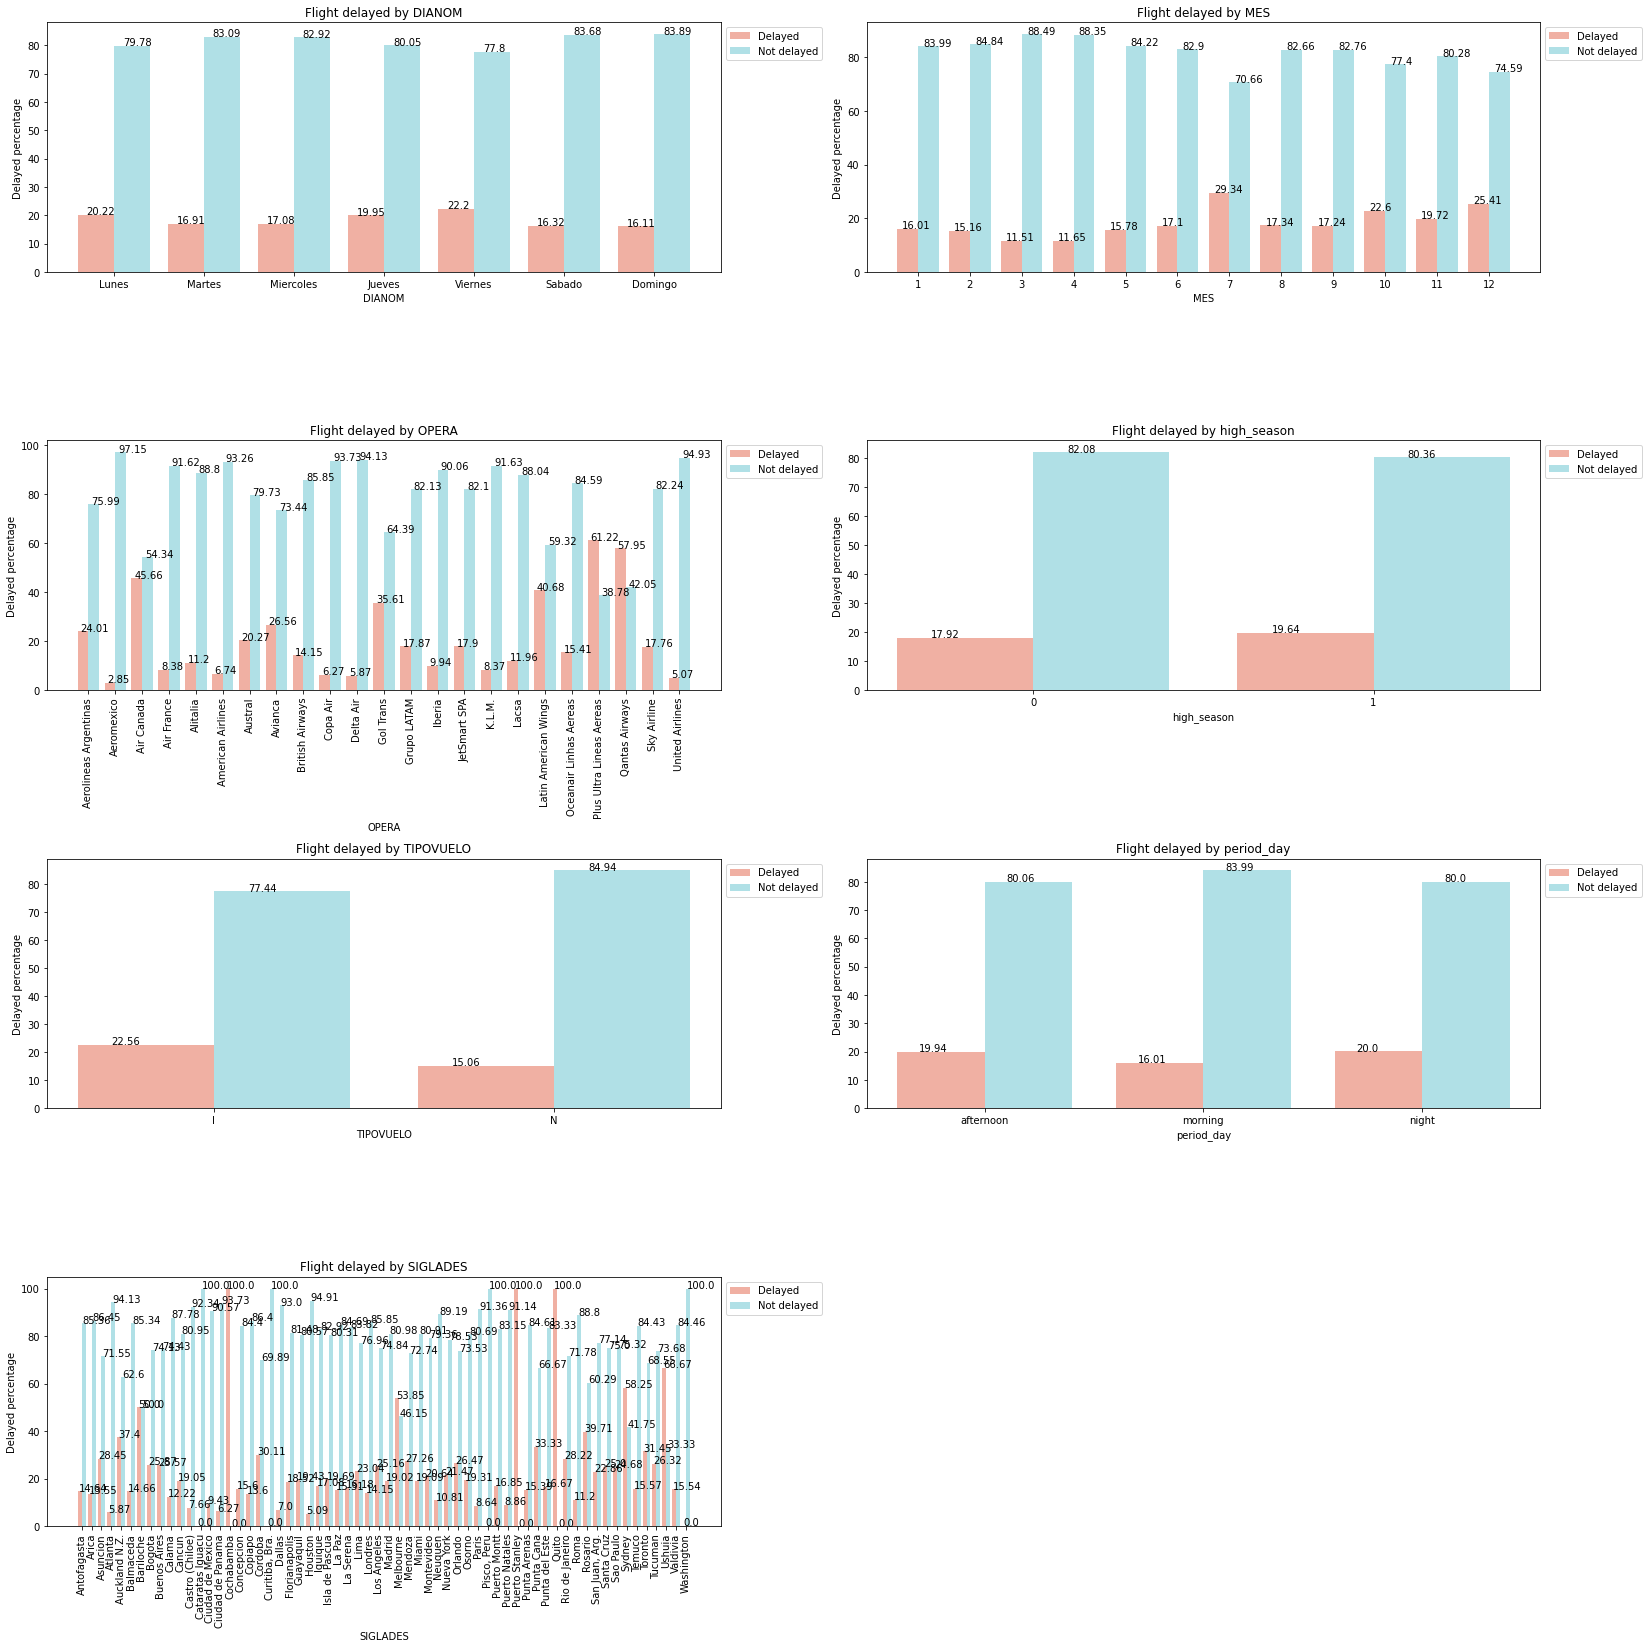

In [118]:
########## Plotting previous values ##########

variables = ['DIANOM', 'MES', 'OPERA', 'high_season', 'TIPOVUELO', 'period_day', 'SIGLADES'] # list of variables to plot
num_variables = len(variables) # number of variables
num_rows = (num_variables+1)//2 # number of rows in the subplot grid
fig, axs = plt.subplots(num_rows, ncols=2, figsize=(23,23), squeeze=False) # create the subplot grid #14,14
colors = ['#f0b0a3', '#B0E0E6']

for i, variable in enumerate(variables):
    row = i//2 # row number for this subplot
    col = i%2 # column number for this subplot
    
    # group the data by the variable and delay_15 column
    df_grouped = df.groupby(variable)['delay_15'].agg(
    [('delay_15_count', lambda x: (x == 1).sum()),
     ('total_count', 'count'),
     ('delay_15_ratio', lambda x: ((x == 1).sum() / x.count())*100),
     ('no_delay_15_ratio', lambda x: ((x == 0).sum() / x.count())*100)]).reset_index()

    if variable == 'DIANOM':
        df_grouped[variable] = pd.Categorical(df_grouped[variable], categories=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado','Domingo'], ordered=True)
        df_grouped.sort_values(variable, inplace=True)

    # extract the delayed_1 and delayed_0 values as lists
    delayed_1 = df_grouped['delay_15_ratio'].values.tolist()
    delayed_0 = df_grouped['no_delay_15_ratio'].values.tolist()

    # create the X_axis and width variables
    X_axis = np.arange(df_grouped[variable].value_counts().shape[0])
    width = 0.4
    
    # create the bar chart and text labels for delayed_1
    axs[row, col].bar(X_axis - width/2, delayed_1, width, label = 'Delayed', color=colors[0])
    for j, v in enumerate(delayed_1):
        v_ = round(v, 2)
        axs[row, col].text(X_axis[j] - width*0.75, v_ + 0.2, str(v_))

    # create the bar chart and text labels for delayed_0
    axs[row, col].bar(X_axis + width/2, delayed_0, width, label = 'Not delayed', color=colors[1])
    for j, v in enumerate(delayed_0):
        v_ = round(v, 2)
        axs[row, col].text(X_axis[j] + width*0.25, v_ + 0.1, str(v_))

    # set the xticks, xlabel, ylabel, and title for this subplot
    axs[row, col].set_xticks(X_axis)
    axs[row, col].set_xticklabels(df_grouped[variable].unique().tolist())
    axs[row, col].set_xlabel(variable)
    axs[row, col].set_ylabel("Delayed percentage")
    axs[row, col].set_title(f"Flight delayed by {variable}")
    if variable == 'OPERA' or variable == 'SIGLADES':
        axs[row, col].tick_params(axis='x', rotation=90)


    axs[row, col].legend(bbox_to_anchor=(1.0, 1.0))
# remove any extra subplots if there are an odd number of variables
if num_variables % 2 != 0:
    fig.delaxes(axs[num_rows-1, 1])

# add the legend to the last subplot
#axs[num_rows-1, 1].legend(bbox_to_anchor=(1.0, 1.0))

# adjust the spacing between subplots
plt.tight_layout()

# display the plot
plt.show()

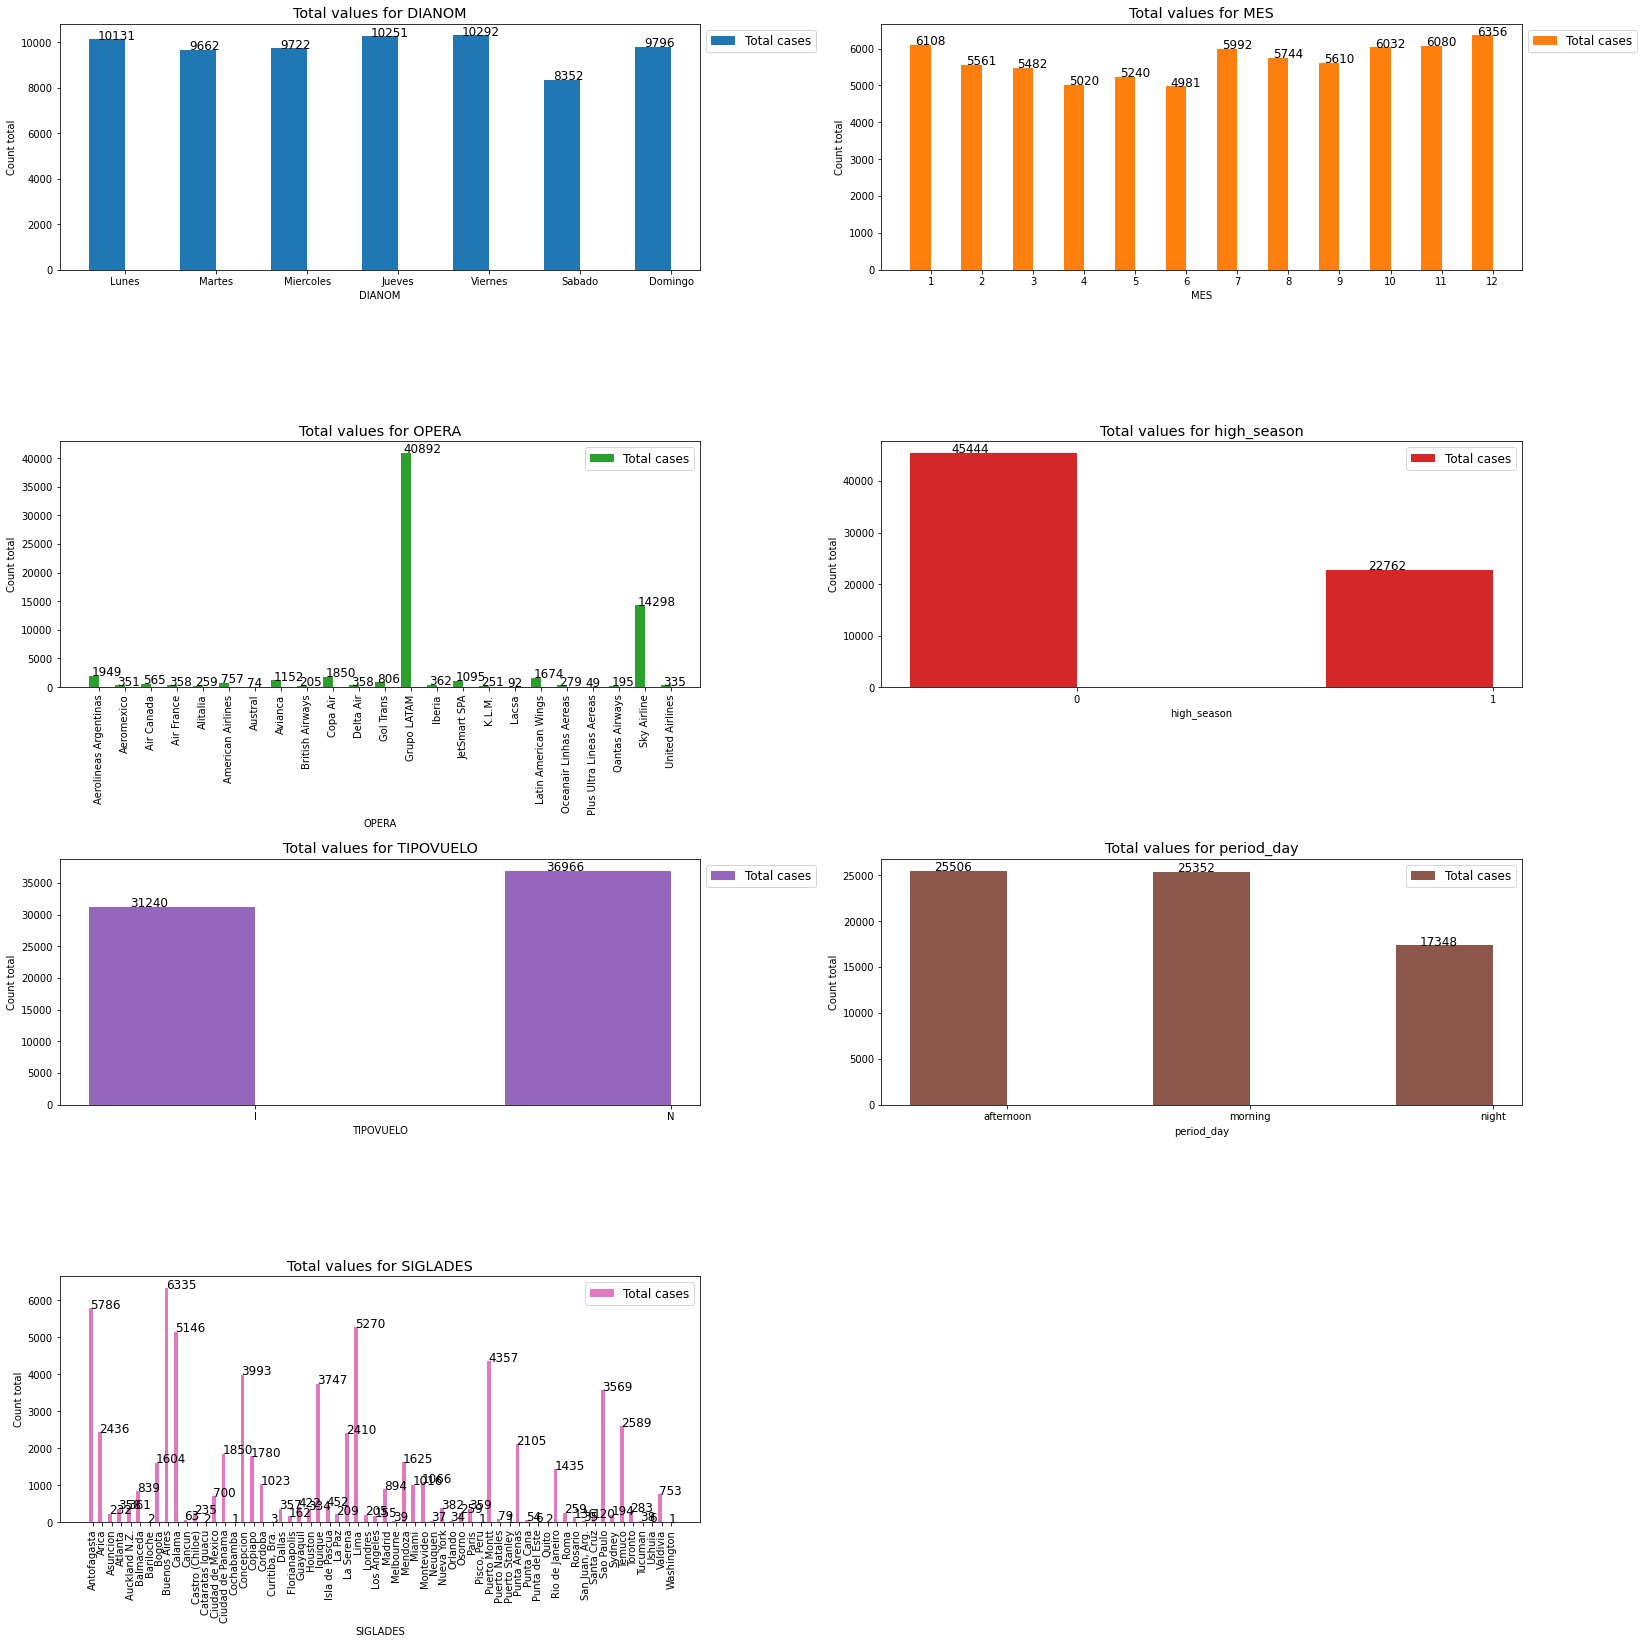

In [119]:
####### Plotting  total values in each category #########


variables = ['DIANOM', 'MES', 'OPERA', 'high_season', 'TIPOVUELO', 'period_day', 'SIGLADES'] # list of variables to plot
num_variables = len(variables) # number of variables
num_rows = (num_variables+1)//2 # number of rows in the subplot grid
fig, axs = plt.subplots(num_rows, ncols=2, figsize=(23,23), squeeze=False) # create the subplot grid #14,14

plt.rcParams.update({'font.size': 12})

prop_iter = iter(plt.rcParams['axes.prop_cycle'])


for i, variable in enumerate(variables):
    row = i//2 # row number for this subplot
    col = i%2 # column number for this subplot
    
    # group the data by the variable and delay_15 column
    df_grouped = df.groupby(variable)['delay_15'].agg(
    [('delay_15_count', lambda x: (x == 1).sum()),
     ('total_count', 'count'),
     ('delay_15_ratio', lambda x: ((x == 1).sum() / x.count())*100),
     ('no_delay_15_ratio', lambda x: ((x == 0).sum() / x.count())*100)]).reset_index()

    if variable == 'DIANOM':
        df_grouped[variable] = pd.Categorical(df_grouped[variable], categories=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado','Domingo'], ordered=True)
        df_grouped.sort_values(variable, inplace=True)

    # extract the delayed_1 and delayed_0 values as lists
    delayed_1 = df_grouped['total_count'].values.tolist()
    #delayed_0 = df_grouped['no_delay_15_ratio'].values.tolist()

    # create the X_axis and width variables
    X_axis = np.arange(df_grouped[variable].value_counts().shape[0])
    width = 0.4
    
    # create the bar chart and text labels for delayed_1
    axs[row, col].bar(X_axis - width/2, delayed_1, width, label = 'Total cases', color=next(prop_iter)['color'])
    for j, v in enumerate(delayed_1):
        v_ = round(v, 2)
        axs[row, col].text(X_axis[j] - width*0.75, v_ + 0.2, str(v_))

    # set the xticks, xlabel, ylabel, and title for this subplot
    axs[row, col].set_xticks(X_axis)
    axs[row, col].set_xticklabels(df_grouped[variable].unique().tolist())
    axs[row, col].set_xlabel(variable)
    axs[row, col].set_ylabel("Count total")
    axs[row, col].set_title(f"Total values for {variable}")
    if variable == 'OPERA' or variable == 'SIGLADES':
        axs[row, col].tick_params(axis='x', rotation=90)


    axs[row, col].legend(bbox_to_anchor=(1.0, 1.0))
# remove any extra subplots if there are an odd number of variables
if num_variables % 2 != 0:
    fig.delaxes(axs[num_rows-1, 1])

# add the legend to the last subplot
#axs[num_rows-1, 1].legend(bbox_to_anchor=(1.0, 1.0))

# adjust the spacing between subplots
plt.tight_layout()

# display the plot
plt.show()

### Pregunta 4 | Question 4

Train one or several models (using the algorithm(s) of your choice) to estimate the likelihood of a flight delay.
Feel free to generate additional variables and/or supplement with external variables.

##### Add more data

In [120]:
import requests

In [303]:
def get_table_from_url(url: str)-> pd.DataFrame:
    response = requests.get(url)
    tables = pd.read_html(response.text, header=1)
    return tables[0].iloc[:31].set_index('Día')

In [304]:
url = 'https://climatologia.meteochile.gob.cl/application/anual/presionQnhAnual/330020/2017'
df_presion = get_table_from_url(url)

In [305]:
url = "https://climatologia.meteochile.gob.cl/application/anual/vientoPredominanteAnual18Direcciones/330020/2017"
df_viento =  get_table_from_url(url)

In [306]:
url = "https://climatologia.meteochile.gob.cl/application/anual/aguaCaidaAnual/330020/2017"
df_precipitacion = get_table_from_url(url)
df_precipitacion.replace(to_replace='s/p', value=0, inplace=True)

In [307]:
url = "https://climatologia.meteochile.gob.cl/application/anual/cieloCubiertoAnual/330020/2017"
df_cielocubierto = get_table_from_url(url)

In [308]:
def dataframe_beautifier(df, magnitud):
    df_melted = pd.melt(df.reset_index(), id_vars=['Día'], var_name='MES', value_name=magnitud)
    df_melted = df_melted.dropna()

    df_melted = df_melted.rename(columns={'index': 'Día'})
    
    mes_numero_dict = {'Ene': 1, 'Feb': 2, 'Mar': 3, 'Abr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Ago': 8,
                       'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dic': 12}
    df_melted['MES'] = df_melted['MES'].replace(mes_numero_dict)
    df_melted['AÑO'] = 2017
    df_melted['Día'] = df_melted['Día'].astype(int)
    
    return df_melted.rename(columns={'Día': 'DIA'})[['AÑO', 'MES', 'DIA', magnitud]].copy()

In [309]:
df_cielocubierto = dataframe_beautifier(df_cielocubierto, 'nubosidad')
df_precipitacion = dataframe_beautifier(df_precipitacion, 'precipitacion')
df_viento = dataframe_beautifier(df_viento, 'direccion_viento')
df_presion = dataframe_beautifier(df_presion, 'presion_hPa')

In [336]:
df_cielocubierto['nubosidad'] = df_cielocubierto['nubosidad'].astype(int)
df_precipitacion['precipitacion'] = df_precipitacion['precipitacion'].astype(float)
df_presion['presion_hPa'] = df_presion['presion_hPa'].astype(float)

In [264]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import CatBoostEncoder

In [318]:
## Quitamos los pocos casos de Destinos (OUTLIERS)
subdf = df['SIGLADES'].value_counts().to_frame('total')
few_cases = subdf[subdf['total']<7].index.tolist() # few cases
df = df[~df['SIGLADES'].isin(few_cases)]

In [319]:
df.shape

(68181, 22)

In [355]:
## cruzamos con la info anterior
df = pd.merge(df, df_cielocubierto, how='left', on=['AÑO', 'MES', 'DIA'])
df['nubosidad'].fillna((df['nubosidad'].mean()), inplace=True)

df = pd.merge(df, df_precipitacion, how='left', on=['AÑO', 'MES', 'DIA'])
df['precipitacion'].fillna((df['precipitacion'].mean()), inplace=True)

df = pd.merge(df, df_viento, how='left', on=['AÑO', 'MES', 'DIA'])
df['direccion_viento'].fillna(method='bfill', inplace=True)

df = pd.merge(df, df_presion, how='left', on=['AÑO', 'MES', 'DIA'])
df['presion_hPa'].fillna((df['presion_hPa'].mean()), inplace=True)

df.shape


(68181, 26)

In [357]:
#df_cielocubierto cantidad
#df_precipitacion cantidad
#df_viento category baja
#df_presion cantidad

In [393]:
# Extrayendo solo variables necesarias
final_df = df[['Fecha-I', 'Des-I', 'Emp-I', 'DIA', 
               'MES', 'DIANOM', 'TIPOVUELO', 'nubosidad', 'precipitacion', 'direccion_viento', 'presion_hPa',
                'OPERA', 'SIGLADES', 'high_season', 'period_day', 'delay_15']].copy()


# tratando variables ciclicas
final_df['hour'] = df['Fecha-I'].dt.hour.astype(int)
final_df['minute'] = df['Fecha-I'].dt.minute.astype(int)


final_df['MES_sin'] = np.sin((final_df.MES-1)*(2.*np.pi/12))
final_df['MES_cos'] = np.cos((final_df.MES-1)*(2.*np.pi/12))

final_df['DIA_sin'] = np.sin((final_df.DIA-1)*(2.*np.pi/7))
final_df['DIA_cos'] = np.cos((final_df.DIA-1)*(2.*np.pi/7))

final_df['hour_sin'] = np.sin(final_df.hour*(2.*np.pi/24))
final_df['hour_cos'] = np.cos(final_df.hour*(2.*np.pi/24))

final_df['minute_sin'] = np.sin(final_df.minute*(2.*np.pi/60))
final_df['minute_cos'] = np.cos(final_df.minute*(2.*np.pi/60))

final_df.drop(['Fecha-I', 'MES', 'DIA', 'hour', 'minute'], inplace=True, axis=1)

In [394]:
X = final_df.drop('delay_15', axis=1)
y = final_df['delay_15']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [395]:
# OHE
cat_little_vars = ['TIPOVUELO', 'DIANOM', 'high_season', 'period_day']
ohe = OneHotEncoder()
ohe_train = ohe.fit_transform(X_train[cat_little_vars])
ohe_test = ohe.transform(X_test[cat_little_vars])

In [396]:
X_train = pd.concat([X_train, pd.DataFrame(ohe_train.toarray(), columns=ohe.get_feature_names(cat_little_vars))], axis=1)
X_train.drop(columns=cat_little_vars, inplace=True)
X_train.shape

C:\Users\Nilton\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(47726, 30)

In [397]:
X_test = pd.concat([X_test, pd.DataFrame(ohe_test.toarray(), columns=ohe.get_feature_names(cat_little_vars))], axis=1)
X_test.drop(columns=cat_little_vars, inplace=True)
X_test.shape

(20455, 30)

In [398]:
# CatboostEncoder
cat_large_vars = ['SIGLADES', 'OPERA', 'Emp-I', 'Des-I', 'direccion_viento']
cbe = CatBoostEncoder()
cbe_train = cbe.fit_transform(X_train[cat_large_vars], y_train)
cbe_test = cbe.transform(X_test[cat_large_vars])

In [399]:
X_train.shape

(47726, 30)

In [400]:
X_train.drop(columns=cat_large_vars, inplace=True)
X_train = pd.concat([X_train, cbe_train], axis=1)
X_train.shape

(47726, 30)

In [401]:
X_test.drop(columns=cat_large_vars, inplace=True)
X_test = pd.concat([X_test, cbe_test], axis=1)
X_test.shape

(20455, 30)

In [402]:
values_to_scale = ['nubosidad', 'precipitacion', 'presion_hPa', 'direccion_viento']
sc = StandardScaler()
x_train_scaled = sc.fit_transform(X_train[values_to_scale])
X_test_scaled = sc.transform(X_test[values_to_scale])

In [410]:
X_train.drop(columns=values_to_scale, inplace=True)
X_train = pd.concat([X_train, pd.DataFrame(x_train_scaled, columns=values_to_scale)], axis=1)
X_train.shape

(47726, 30)

In [411]:
X_test.drop(columns=values_to_scale, inplace=True)
X_test = pd.concat([X_test, pd.DataFrame(X_test_scaled, columns=values_to_scale)], axis=1)
X_test.shape

(20455, 30)

In [412]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import f1_score, roc_curve, auc, precision_recall_curve, roc_auc_score

#### logistic

In [413]:
clf = linear_model.LogisticRegression(random_state=7, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [414]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.814042660185224, 0.8199951112197507)

In [416]:
y_pred= clf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

f1_scores = 2 * recall * precision / (recall + precision + 0.001)
threshold = float(thresholds[np.argmax(f1_scores)])
print("Threshold: %s" % threshold)
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC: %s" % roc_auc)
print("F1: %s" % np.max(f1_scores))

Threshold: 0.17701828871307282
AUC: 0.6689000128334641
F1: 0.3714674673925259


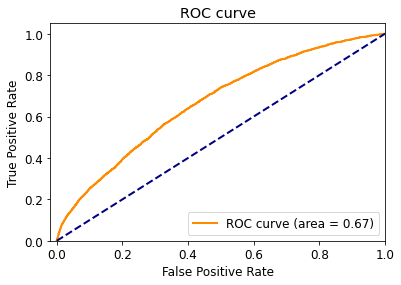

In [417]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### decission tree

In [418]:
clf_dt = DecisionTreeClassifier().fit(X_train, y_train)

In [419]:
clf_dt.score(X_train, y_train), clf_dt.score(X_test, y_test)

(1.0, 0.7447078953801026)

In [420]:
y_pred= clf_dt.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

f1_scores = 2 * recall * precision / (recall + precision + 0.001)
threshold = float(thresholds[np.argmax(f1_scores)])
print("Threshold: %s" % threshold)
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC: %s" % roc_auc)
print("F1: %s" % np.max(f1_scores))


Threshold: 0.0
AUC: 0.565507505259532
F1: 0.3069359715604639


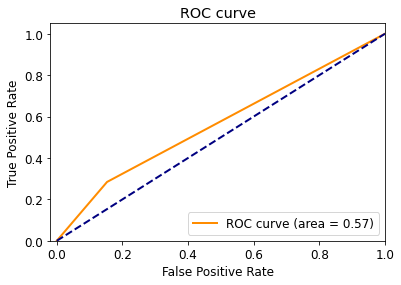

In [421]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### random forest

In [422]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

In [423]:
rf_classifier.score(X_train, y_train), rf_classifier.score(X_test, y_test)

(0.9999790470603026, 0.8278171596186752)

In [424]:
y_pred= rf_classifier.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

f1_scores = 2 * recall * precision / (recall + precision + 0.001)
threshold = float(thresholds[np.argmax(f1_scores)])
print("Threshold: %s" % threshold)
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC: %s" % roc_auc)
print("F1: %s" % np.max(f1_scores))


Threshold: 0.25
AUC: 0.7197096055453953
F1: 0.42112252105293546


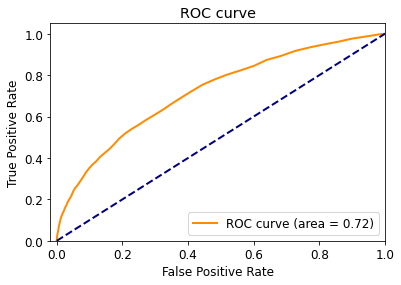

In [426]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### neural network

In [427]:
nn_clf = MLPClassifier(random_state=7).fit(X_train, y_train)

C:\Users\Nilton\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [428]:
nn_clf.score(X_train, y_train), nn_clf.score(X_test, y_test)

(0.8316850354104681, 0.8213639696895625)

In [432]:
y_pred= nn_clf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

f1_scores = 2 * recall * precision / (recall + precision + 0.001)
threshold = float(thresholds[np.argmax(f1_scores)])
print("Threshold: %s" % threshold)
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC: %s" % roc_auc)
print("F1: %s" % np.max(f1_scores))

Threshold: 0.20659071708872231
AUC: 0.7011226030899171
F1: 0.4000888180282758


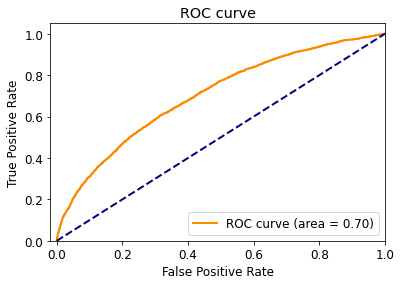

In [431]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Support Vector classifier

In [687]:
clf_svc = SVC(kernel='rbf', probability=True)
clf_svc.fit(X_train, y_train)

In [661]:
import pickle
pickle.dump(clf_svc, open('svc_.sav', 'wb'))
#load:
#clf_svc = pickle.load(open('svc_.sav', 'rb'))

In [662]:
clf_svc.score(X_train, y_train), clf_svc.score(X_test, y_test)

(0.813854083727947, 0.8186262527499389)

In [686]:
y_pred= clf_svc.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

f1_scores = 2 * recall * precision / (recall + precision + 0.001)
threshold = float(thresholds[np.argmax(f1_scores)])
print("Threshold: %s" % threshold)
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC: %s" % roc_auc)
print("F1: %s" % np.max(f1_scores))

AttributeError: predict_proba is not available when  probability=False

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### KNN

In [433]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [434]:
neigh.score(X_train, y_train), neigh.score(X_test, y_test)

(0.8401290701085362, 0.7918357369836226)

In [435]:
y_pred= neigh.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

f1_scores = 2 * recall * precision / (recall + precision + 0.001)
threshold = float(thresholds[np.argmax(f1_scores)])
print("Threshold: %s" % threshold)
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC: %s" % roc_auc)
print("F1: %s" % np.max(f1_scores))

Threshold: 0.2
AUC: 0.6171598008920867
F1: 0.3423467492578338


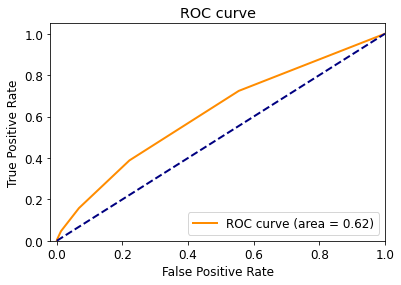

In [436]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Gradient boost

In [437]:
clf_gb = GradientBoostingClassifier(n_estimators=100, max_depth=4, random_state=7).fit(X_train, y_train)

In [438]:
clf_gb.score(X_train, y_train), clf_gb.score(X_test, y_test)

(0.8243515065163642, 0.8248838914690785)

In [439]:
y_pred= clf_gb.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

f1_scores = 2 * recall * precision / (recall + precision + 0.001)
threshold = float(thresholds[np.argmax(f1_scores)])
print("Threshold: %s" % threshold)
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC: %s" % roc_auc)
print("F1: %s" % np.max(f1_scores))

Threshold: 0.21840242630070744
AUC: 0.7193676506857214
F1: 0.4147450857299806


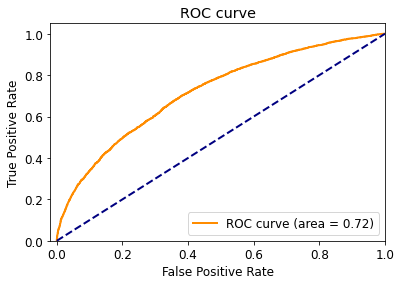

In [440]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

### Pregunta 5 | Question 5

Evaluate model performance in the predictive task across each model that you trained. Define and justify what metrics you used
to assess model performance. Pick the best trained model and evaluate the following: What variables were the most influential in
the prediction task? How could you improve the performance?

#### Best model  F1-SCORE:

[ESP]

Random forest por tener mejor F1-Score para predecir los retrasos de vuelos.
Elegí F1-Score porque es una métrica de evaluación que tiene en cuenta tanto la precisión como el recall.
La precision es la proporción de predicciones positivas que son correctas de entre todas las predicciones como positivas (retraso de vuelo) mientras que el 'recall' se refiere a la proporción de casos positivos que el modelo identificó correctamente de entre los verdaderos casos positivos (todos los retrasos de vuelo que se vió en el dataset) .

El puntaje F1-Score es una medida combinada de la precision y del recall y es especialmente útil por tener clases desbalanceadas como
en este dataset.

[EN]

Random forest for having better F1-Score to predict flight delays.
I chose F1-Score because it is an evaluation metric that takes both accuracy and recall into account.
The precision is the proportion of positive predictions that are correct among all the predictions as positive (flight delay) while the 'recall' refers to the proportion of positive cases that the model correctly identified among the true positive cases (all flight delays seen in the dataset) .

The F1-Score is a combined measure of precision and recall and is especially useful for having unbalanced classes like
in this dataset.

#### ¿ Como se podria mejorar el performance ? | How could performance be improved?

[ESP]

* Se puede aplicar un filtro de iv>0.1 (information value) para poder obtener que valores aportan mas al modelo y enfocarnos a ellos.
* Quitar las variables correlacionadas que no se realizó en este proeso.
* La data imbalaceanda que se tiene porque hay mas casos de no retraso que retraso es un punto en contra por lo que se debe pasar un proceso de under sampling o over sampling
* Por el tiempo no se miro los mejores hiperparametros para cada modelo y no se hizo un kfold para disminuir el overfitting

Análisis como el ks o psi para poder lograr tener una vision más clara de nuestros resultados siempre son bienvenidos pero mejoraría la estabilidad y la eleccion del modelo más no necesariamente el performance.

[EN]

* You can apply a filter of iv>0.1 (information value) to be able to obtain which values contribute more to the model and focus on them.
* Remove the correlated variables that was not done in this process.
* The unbalanced data that you have because there are more cases of non-delay than delay is a point against so you must go through an under sampling or over sampling process
* Due to time, the best hyperparameters for each model were not looked at and a kfold was not made to reduce overfitting

Analysis such as ks or psi to be able to have a clearer vision of our results are always welcome, but it would improve the stability and the choice of the model, but not necessarily the performance.
